In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
detector = dlib.get_frontal_face_detector()

In [3]:
sp = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat') #68個臉部偵測點

In [4]:
model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat') #人臉辨識

In [5]:
img1_path = 'sample/Tai.jpg'
img2_path = 'input/2.jpg' 

In [6]:
img1 = dlib.load_rgb_image(img1_path)
img2 = dlib.load_rgb_image(img2_path)

In [7]:
img1_detected = detector(img1,1)
img2_detected = detector(img2,1)

In [8]:
print(img1_detected[0]) #偵測到圖片人臉部的x,y,x+w,y+h

[(339, 110) (468, 239)]


In [9]:
img1_shape = sp(img1,img1_detected[0]) #偵測出這個範圍人臉的68個特徵點
img2_shape = sp(img2,img2_detected[0])

In [10]:
img1_aligned = dlib.get_face_chip(img1,img1_shape) #人臉對齊
img2_aligned = dlib.get_face_chip(img2,img2_shape)

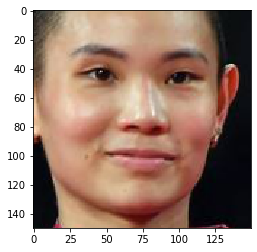

In [11]:
plt.imshow(img1_aligned)

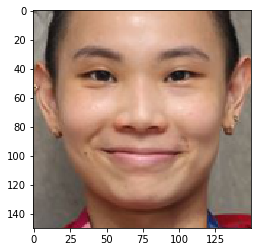

In [12]:
plt.imshow(img2_aligned)

In [13]:
img1_representation = model.compute_face_descriptor(img1_aligned)
img2_representation = model.compute_face_descriptor(img2_aligned)

In [14]:
img1_representation = np.array(img1_representation)
img2_representation = np.array(img2_representation)

In [15]:
class same_or_not():
    def __init__(self,source,test,threshold = 0.42):
        self.source = source
        self.test = test
        self.threshold = threshold
    def the_same(self):
        Euclidean_distance = np.sqrt(sum((self.source-self.test)**2))
        if Euclidean_distance > self.threshold:
            print('They are different.')
        else:
            print('They are the same.')

In [16]:
a = same_or_not(img1_representation,img2_representation)
a.the_same()

They are the same.
